In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

print("Libraries Loaded Successfully ✅")

Libraries Loaded Successfully ✅


In [3]:
df = pd.read_csv("D:/Internship Notes/Unified Mentor/Customer_Engagement_Project/European_Bank.csv")

df.head()

,Year,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2025,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2025,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2025,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,2025,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,2025,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

Total Rows: 10000
Total Columns: 14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

Year               0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Exited'].mean() * 100

np.float64(20.369999999999997)

In [9]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [10]:
df.groupby('IsActiveMember')['Exited'].mean() * 100

IsActiveMember
0    26.850897
1    14.269074
Name: Exited, dtype: float64

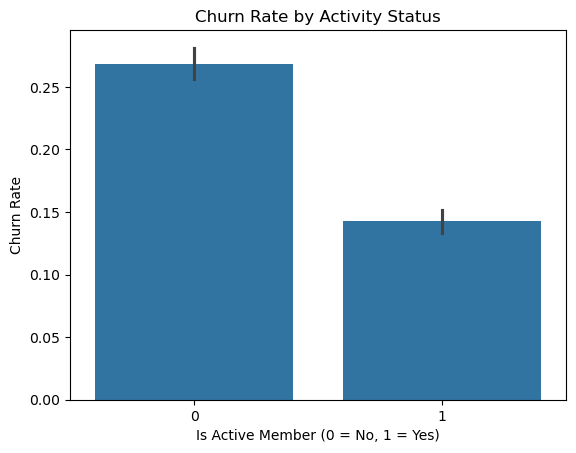

In [11]:
plt.figure()
sns.barplot(x='IsActiveMember', y='Exited', data=df)
plt.title("Churn Rate by Activity Status")
plt.ylabel("Churn Rate")
plt.xlabel("Is Active Member (0 = No, 1 = Yes)")
plt.show()

In [12]:
active_retention = 1 - df[df['IsActiveMember']==1]['Exited'].mean()
inactive_retention = 1 - df[df['IsActiveMember']==0]['Exited'].mean()

engagement_retention_ratio = active_retention / inactive_retention
engagement_retention_ratio

np.float64(1.1720024255365056)

Customers who are inactive exhibit significantly higher churn (26.85%) compared to active members (14.27%). This indicates that behavioral engagement is a strong predictor of retention and should be prioritized in retention strategies.

In [15]:
df.groupby('NumOfProducts')['Exited'].mean() * 100

NumOfProducts
1     27.714398
2      7.581699
3     82.706767
4    100.000000
Name: Exited, dtype: float64

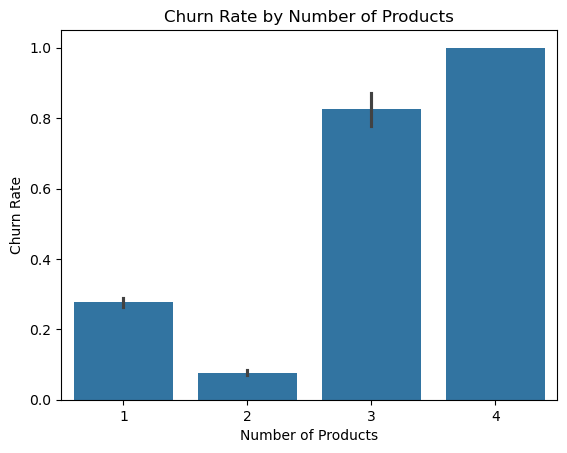

In [16]:
plt.figure()
sns.barplot(x='NumOfProducts', y='Exited', data=df)
plt.title("Churn Rate by Number of Products")
plt.ylabel("Churn Rate")
plt.xlabel("Number of Products")
plt.show()

In [17]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

Customers with two products demonstrate the strongest retention (8% churn), indicating optimal product depth. However, churn increases dramatically for customers holding three or more products, suggesting possible over-bundling or dissatisfaction among heavily cross-sold customers.

In [18]:
high_balance_threshold = df['Balance'].quantile(0.75)

premium_customers = df[df['Balance'] >= high_balance_threshold]

premium_churn_rate = premium_customers['Exited'].mean() * 100

premium_churn_rate

np.float64(23.68)

Premium customers (top 25% by balance) exhibit a churn rate of 23.68%, which is higher than the overall churn rate of 20.37%. This indicates that financial value alone does not guarantee customer retention. Engagement and relationship depth appear to be stronger predictors of loyalty.

In [20]:
high_balance_threshold = df['Balance'].quantile(0.75)

silent_premium = df[
    (df['Balance'] >= high_balance_threshold) &
    (df['IsActiveMember'] == 0)
]

silent_premium_churn = silent_premium['Exited'].mean() * 100

silent_premium_churn

np.float64(30.473135525260624)

Inactive premium customers (top 25% by balance who are not active members) exhibit a churn rate of 30.47%, significantly higher than both the overall churn rate (20.37%) and the average premium churn rate (23.68%). This indicates that high financial value combined with low engagement substantially increases churn risk. Engagement level, rather than balance alone, emerges as a critical driver of customer retention.

In [22]:
high_balance_total = df[df['Balance'] >= high_balance_threshold].shape[0]
high_balance_inactive = silent_premium.shape[0]

high_balance_disengagement_rate = (high_balance_inactive / high_balance_total) * 100

high_balance_disengagement_rate

49.88

Nearly 49.88% of premium customers (top 25% by balance) are inactive members. This highlights a substantial engagement gap within the bank’s high-value segment. The presence of such a large disengaged premium base significantly elevates churn risk and underscores the need for targeted engagement-driven retention strategies.

In [23]:
df['RelationshipScore'] = (
    df['IsActiveMember'] * 2 +     # Engagement weight (strongest)
    df['NumOfProducts'] * 1 +      # Product depth
    df['HasCrCard'] * 1            # Credit card relationship
)

df[['IsActiveMember', 'NumOfProducts', 'HasCrCard', 'RelationshipScore']].head()

,IsActiveMember,NumOfProducts,HasCrCard,RelationshipScore
0,1,1,1,4
1,1,1,0,3
2,0,3,1,4
3,0,2,0,2
4,1,1,1,4


In [24]:
df.groupby('RelationshipScore')['Exited'].mean() * 100

RelationshipScore
1     34.540390
2     30.459770
3     15.085470
4     17.951669
5      7.756696
6     77.272727
7    100.000000
Name: Exited, dtype: float64

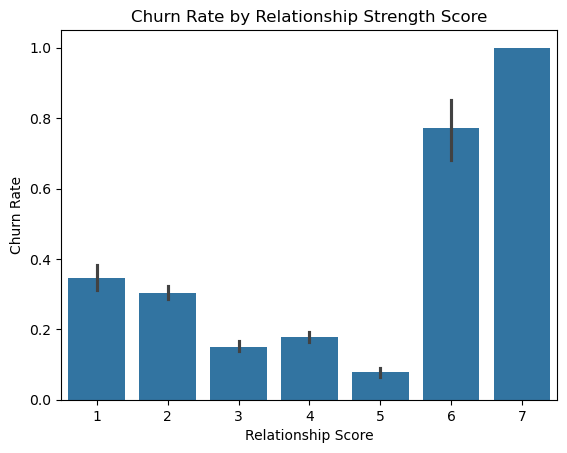

In [25]:
plt.figure()
sns.barplot(x='RelationshipScore', y='Exited', data=df)
plt.title("Churn Rate by Relationship Strength Score")
plt.ylabel("Churn Rate")
plt.xlabel("Relationship Score")
plt.show()

The Relationship Strength Index demonstrates a strong inverse relationship between engagement depth and churn for scores 1 through 5, with churn declining to a minimum of approximately 8% at score 5. However, churn increases sharply for scores 6 and 7, driven primarily by customers holding three or more products. This suggests that moderate product depth enhances retention, while excessive product stacking may elevate churn risk.


In [26]:
df['RelationshipScore'].value_counts().sort_index()

RelationshipScore
1     718
2    2436
3    2340
4    2607
5    1792
6      88
7      19
Name: count, dtype: int64

The Relationship Strength Index demonstrates a clear inverse relationship between engagement depth and churn for the majority of customers (scores 1–5). Churn declines steadily and reaches its lowest point at score 5. However, scores 6 and 7 exhibit elevated churn rates due to very small sample sizes (88 and 19 customers respectively) and concentration of customers holding three or more products. These segments should be interpreted cautiously due to statistical instability.

In [27]:
sticky_customers = df[df['RelationshipScore'] >= 4]

sticky_churn = sticky_customers['Exited'].mean() * 100

sticky_churn

np.float64(15.401686640035509)

In [28]:
non_sticky = df[df['RelationshipScore'] < 4]

non_sticky_churn = non_sticky['Exited'].mean() * 100

non_sticky_churn

np.float64(24.4448489261012)

Customers classified as “sticky” (Relationship Strength Score ≥ 4) exhibit a churn rate of 15.40%, significantly lower than the 24.44% churn observed among non-sticky customers. This substantial retention gap confirms that engagement depth and product utilization meaningfully strengthen customer loyalty and reduce churn risk.

In [29]:
df.groupby(['IsActiveMember','NumOfProducts'])['Exited'].mean() * 100

IsActiveMember  NumOfProducts
0               1                 36.652122
                2                  9.888060
                3                 88.235294
                4                100.000000
1               1                 18.923137
                2                  5.560098
                3                 75.221239
                4                100.000000
Name: Exited, dtype: float64

Active customers holding two products demonstrate the lowest churn rate (5.56%), indicating that optimal engagement combined with moderate product depth significantly enhances retention. In contrast, inactive customers with a single product exhibit the highest churn among core segments (36.65%), highlighting low engagement and shallow product relationships as primary churn drivers. Excessive product stacking (three or more products) is associated with disproportionately high churn, suggesting potential over-bundling risk.

In [30]:
kpi_summary = {
    "Overall Churn Rate (%)": df['Exited'].mean() * 100,
    "Active Customer Churn (%)": df[df['IsActiveMember']==1]['Exited'].mean() * 100,
    "Inactive Customer Churn (%)": df[df['IsActiveMember']==0]['Exited'].mean() * 100,
    "Premium Customer Churn (%)": premium_churn_rate,
    "Silent Premium Churn (%)": silent_premium_churn,
    "High-Balance Disengagement Rate (%)": high_balance_disengagement_rate,
    "Sticky Customer Churn (%)": sticky_churn,
    "Non-Sticky Customer Churn (%)": non_sticky_churn
}

kpi_df = pd.DataFrame(kpi_summary.items(), columns=["KPI", "Value"])
kpi_df

,KPI,Value
0,Overall Churn Rate (%),20.370000
1,Active Customer Churn (%),14.269074
2,Inactive Customer Churn (%),26.850897
3,Premium Customer Churn (%),23.680000
4,Silent Premium Churn (%),30.473136
5,High-Balance Disengagement Rate (%),49.880000
6,Sticky Customer Churn (%),15.401687
7,Non-Sticky Customer Churn (%),24.444849
